> **Import required libraries**

In [45]:
from numpy.random import seed
seed(1)
#from tensorflow import set_random_seed
#set_random_seed(2)
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk  # For test pre-processing
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn import preprocessing

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.metrics import roc_curve,auc
from keras.preprocessing.text import Tokenizer
#from keras.preprocessing.sequence import pad_sequences
from keras import Sequential
from keras.layers import Embedding,LSTM,Dense
import warnings
from joblib import dump,load
warnings.filterwarnings('ignore')
import os


> Load the data

In [46]:
df_movie = pd.read_csv('data/train_preprocessed__cntrc_exp_1__lmmtiz_1__stpwrd_rm_1.csv')
df_movie.drop(columns=['Unnamed: 0'],axis=1,inplace=True)
df_movie.astype({"label" : "int16"})
df_movie

,text,label
0,distinct disadvantage not see first two movie ...,0
1,micro phony classic stooge short guy inept rep...,1
2,story tell deadly disease spread around extra ...,1
3,post comment imdb currently rate alfre hitchco...,0
4,film reeeeeeallyyyy bad mean comedy could not ...,0
...,...,...
29995,brilliant well make contribution group fan con...,1
29996,tell movie thought would another chick flick w...,1
29997,get bad series serious fall first two sequel a...,0
29998,big fat slob uncle buck play john eat lot cand...,0


Stats of our data

In [47]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    30000 non-null  object
 1   label   30000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 468.9+ KB


In [48]:
df_movie.describe()

,label
count,30000.000000
mean,0.416667
std,0.493015
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


> Split the data into train & test datasets

In [51]:
len(df_movie) * 0.9
X_train, X_test, y_train, y_test = train_test_split(df_movie["text"], df_movie["label"], test_size=0.10)

X_train.head()

28118    erendira film mexico rarely talk film exist lo...
8516     movie vehicle schwarzenegger clone alexander n...
21023    see tv long ago can not remember still stand o...
19836    wrong 2007 version rip original ask dvd buy on...
20892    start blast movie first remove abbott costello...
Name: text, dtype: object

> Let's create features using bag of words model

It is used to convert text documents to numerical vectors or bag of words.

In [52]:
cv = CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)
print('Shape of X_train_cv::',X_train_cv.shape)
print('Shape of X_test_cv::',X_test_cv.shape)

Shape of X_train_cv:: (27000, 4167675)
Shape of X_test_cv:: (3000, 4167675)


<27000x4167675 sparse matrix of type '<class 'numpy.int64'>'
	with 4167675 stored elements in Compressed Sparse Row format>

Our train & test dataset contains 1929440 attributes each.

In [28]:
tv=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))
X_train_tv = tv.fit_transform(X_train)
X_test_tv = tv.transform(X_test)
print('Shape of X_train_cv::',X_train_tv.shape)
print('Shape of X_test_cv::',X_test_tv.shape)

Shape of X_train_cv:: (27000, 4175118)
Shape of X_test_cv:: (3000, 4175118)
Shape of X_train_cv:: (27000, 4175118)
Shape of X_test_cv:: (3000, 4175118)
Shape of X_train_cv:: (27000, 4175118)
Shape of X_test_cv:: (3000, 4175118)


In [30]:
from sklearn.linear_model import LogisticRegression

#training the model
lr=LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)
#Fitting the model for Bag of words
lr_bow=lr.fit(X_train_cv,y_train)
lr_bow

LogisticRegression(C=1, max_iter=500, random_state=42)

In [31]:
#Fitting the model for tfidf features
lr_tfidf=lr.fit(X_train_tv,y_train)
lr_tfidf

LogisticRegression(C=1, max_iter=500, random_state=42)

In [32]:
from sklearn.metrics import accuracy_score

#Predicting the model for bag of words
lr_bow_predict=lr.predict(X_test_cv)
##Predicting the model for tfidf features
lr_tfidf_predict=lr.predict(X_test_tv)

#Accuracy score for bag of words
lr_bow_score=accuracy_score(y_test,lr_bow_predict)
print("lr_bow_score :",lr_bow_score)
#Accuracy score for tfidf features
lr_tfidf_score=accuracy_score(y_test,lr_tfidf_predict)
print("lr_tfidf_score :",lr_tfidf_score)

lr_bow_score : 0.6446666666666667
lr_tfidf_score : 0.578


> Let's build our traditional ML models

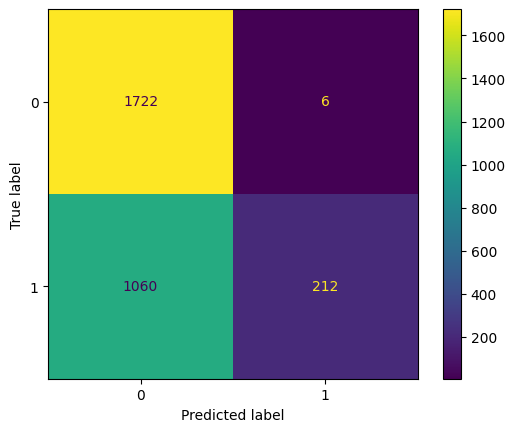

In [42]:
plot_confusion_matrix(lr_bow,X_test_cv,y_test)

In [44]:
print(classification_report(y_test,lr_bow_predict))

              precision    recall  f1-score   support

           0       0.62      1.00      0.76      1728
           1       0.97      0.17      0.28      1272

    accuracy                           0.64      3000
   macro avg       0.80      0.58      0.52      3000
weighted avg       0.77      0.64      0.56      3000



> Random Forest model

In [18]:
%%time
#Training the classifier
rfc=RandomForestClassifier(n_estimators=20,random_state=42)
rfc=rfc.fit(train_cv,train_sentiment)
score=rfc.score(train_cv,train_sentiment)
print('Accuracy of trained model is ::',score)

Accuracy of trained model is :: 0.9996
CPU times: user 2min 14s, sys: 48 ms, total: 2min 14s
Wall time: 2min 14s


In [19]:
%%time
#Making predicitions
rfc_predict=rfc.predict(test_cv)

CPU times: user 1.28 s, sys: 0 ns, total: 1.28 s
Wall time: 1.29 s


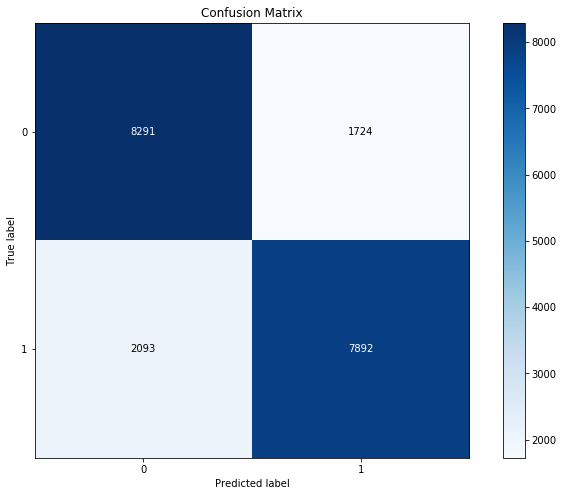

In [20]:
#How accuate our model is?
cm=confusion_matrix(test_sentiment,rfc_predict)
#plot our confusion matrix
skplt.metrics.plot_confusion_matrix(test_sentiment,rfc_predict,normalize=False,figsize=(12,8))
plt.show()


> 0-Negative class,
> 1-Positive class

From the confusion matrix plot, it is concluded that, the Random Forest classifier with 20 decision trees classified the 81% of the reviews (16183 reviews) correctly & remaining 19% of reviews (3817 reviews) are misclassified.

In [21]:
#print classification report for performance metrics
cr=classification_report(test_sentiment,rfc_predict)
print('Classification report is::\n',cr)


Classification report is::
               precision    recall  f1-score   support

           0       0.80      0.83      0.81     10015
           1       0.82      0.79      0.81      9985

   micro avg       0.81      0.81      0.81     20000
   macro avg       0.81      0.81      0.81     20000
weighted avg       0.81      0.81      0.81     20000



In [22]:
# ROC curve for Random Forest Classifier
fpr_rf,tpr_rf,threshold_rf=roc_curve(test_sentiment,rfc_predict)
#Area under curve (AUC) score, fpr-False Positive rate, tpr-True Positive rate
auc_rf=auc(fpr_rf,tpr_rf)
print('AUC score for Random Forest classifier::',np.round(auc_rf,3))

AUC score for Random Forest classifier:: 0.809


** Let's build our deep learning model**


> Recurrent neural network (RNN) with LSTM (Long Short Term Memory) model

In [23]:
#Train dataset
X_train=train_cv
X_train=[str(x[0]) for x in X_train]
y_train=train_sentiment
# Test dataset
X_test=test_cv
X_test=[str(x[0]) for x in X_test]
y_test=test_sentiment


In [24]:
# Tokenize the train & test dataset
Max_Review_length=500
tokenizer=Tokenizer(num_words=Max_Review_length,lower=False)
tokenizer.fit_on_texts(X_train)
#tokenizig train data
X_train_token=tokenizer.texts_to_sequences(X_train)
#tokenizing test data
X_test_token=tokenizer.texts_to_sequences(X_test)

#Truncate or pad the dataset for a length of 500 words for each review
X_train=pad_sequences(X_train_token,maxlen=Max_Review_length)
X_test=pad_sequences(X_test_token,maxlen=Max_Review_length)

In [25]:
print('Shape of X_train datset after padding:',X_train.shape)
print('Shape of X_test dataset after padding:',X_test.shape)

Shape of X_train datset after padding: (30000, 500)
Shape of X_test dataset after padding: (20000, 500)


In [26]:
%%time
# Most poplar words found in the dataset
vocabulary_size=5000 
embedding_size=64
model=Sequential()
model.add(Embedding(vocabulary_size,embedding_size,input_length=Max_Review_length))
model.add(LSTM(30))
model.add(Dense(1,activation='sigmoid',kernel_initializer='random_uniform'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 64)           320000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 30)                11400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 331,431
Trainable params: 331,431
Non-trainable params: 0
_________________________________________________________________
CPU times: user 204 ms, sys: 8 ms, total: 212 ms
Wall time: 211 ms


In [27]:
#Complile our model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [28]:
%%time
#Train our model
batch_size=128
num_epochs=6
X_valid,y_valid=X_train[:batch_size],train_sentiment[:batch_size]
X_train1,y_train1=X_train[batch_size:],train_sentiment[batch_size:]
# Fit the model
model.fit(X_train1,y_train1,validation_data=(X_valid,y_valid),validation_split=0.2,
          batch_size=batch_size,epochs=num_epochs, verbose=1,shuffle=True)


Instructions for updating:
Use tf.cast instead.
Train on 29872 samples, validate on 128 samples
Epoch 1/6
29872/29872 [==============================] - 154s 5ms/step - loss: 0.6018 - acc: 0.6633 - val_loss: 0.4641 - val_acc: 0.7578
Epoch 2/6
29872/29872 [==============================] - 155s 5ms/step - loss: 0.4859 - acc: 0.7692 - val_loss: 0.4298 - val_acc: 0.7969
Epoch 3/6
29872/29872 [==============================] - 153s 5ms/step - loss: 0.4623 - acc: 0.7847 - val_loss: 0.4166 - val_acc: 0.8047
Epoch 4/6
29872/29872 [==============================] - 156s 5ms/step - loss: 0.4557 - acc: 0.7828 - val_loss: 0.4646 - val_acc: 0.7969
Epoch 5/6
29872/29872 [==============================] - 153s 5ms/step - loss: 0.4566 - acc: 0.7852 - val_loss: 0.4092 - val_acc: 0.8125
Epoch 6/6
29872/29872 [==============================] - 156s 5ms/step - loss: 0.4511 - acc: 0.7860 - val_loss: 0.4314 - val_acc: 0.8125
CPU times: user 20min 37s, sys: 1min 41s, total: 22min 19s
Wall time: 15min 28s


In [29]:
%%time
# Predictions
y_predict_rnn=model.predict(X_test)
#Changing the shape of y_predict to 1-Dimensional
y_predict_rnn1=y_predict_rnn.ravel()
y_predict_rnn1=(y_predict_rnn1>0.5)
y_predict_rnn1[0:10]

CPU times: user 3min 24s, sys: 25.5 s, total: 3min 50s
Wall time: 2min 23s


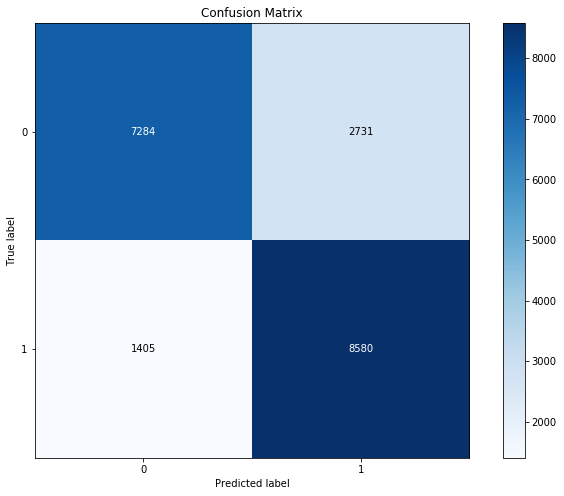

In [30]:
#Confusion matrix for RNN with LSTM
cm_rnn=confusion_matrix(y_test,y_predict_rnn1)
#plot our confusion matrix
skplt.metrics.plot_confusion_matrix(y_test,y_predict_rnn1,normalize=False,figsize=(12,8))
plt.show()



> 0-Negative class,
> 1-Positive class

The confusion matrix plot states that the RNN with LSTM model classified 79% of reviews (15866 reviews) correctly & remaining 21% of reviews (4134 reviews) are misclassified.

In [31]:
#Classification report for performance metrics
cr_rnn=classification_report(y_test,y_predict_rnn1)
print('The Classification report is::\n',cr_rnn)


The Classification report is::
               precision    recall  f1-score   support

           0       0.84      0.73      0.78     10015
           1       0.76      0.86      0.81      9985

   micro avg       0.79      0.79      0.79     20000
   macro avg       0.80      0.79      0.79     20000
weighted avg       0.80      0.79      0.79     20000



In [32]:
#ROC curve for RNN with LSTM
fpr_rnn,tpr_rnn,thresold_rnn=roc_curve(y_test,y_predict_rnn)
#AUC score for RNN
auc_rnn=auc(fpr_rnn,tpr_rnn)
print('AUC score for RNN with LSTM ::',np.round(auc_rnn,3))

AUC score for RNN with LSTM :: 0.878


> **Receiver Operating Characterstic (ROC) Curve for Model Evaluation**

> Now, let's plot the ROC for both Random Forest Classifier &  RNN with LSTM

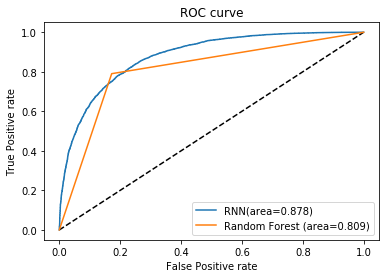

CPU times: user 240 ms, sys: 160 ms, total: 400 ms
Wall time: 213 ms


In [33]:
%%time
plt.figure(1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr_rnn,tpr_rnn,label='RNN(area={:.3f})'.format(auc_rnn))
plt.plot(fpr_rf,tpr_rf,label='Random Forest (area={:.3f})'.format(auc_rf))
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()


In [34]:
#Model Evaluation on unseen dataset
Model_evaluation=pd.DataFrame({'Model':['Random Forest Classifier','RNN with LSTM'],
                              'f1_score':[0.81,0.79],
                              'roc_auc_score':[0.809,0.879]})
Model_evaluation

,Model,f1_score,roc_auc_score
0,Random Forest Classifier,0.81,0.809
1,RNN with LSTM,0.79,0.879


The f1_score for Random forest classier is higher than for RNN with LSTM model & the roc_auc score for Random forest classifier is lower than for RNN with LSTM model. From the above scores, it is good to consider Random forest classifier than RNN with LSTM because it is comparatively less computationally expensive & works well on small & large amount of datasets.